# CIS 731 HW3: ASL Image Classification (Abhiraj Singh) 

Dataset description: https://www.kaggle.com/ayuraj/asl-dataset

In [ ]:
#import relevant libraries
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import time
from keras.callbacks import History
from keras.models import Sequential
import os
import seaborn as sn
import cv2
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pathlib
PATH = '/content/drive/My Drive/Pokemon/ASL/asl_dataset/'
data_dir = pathlib.Path(PATH)

In [ ]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
len(CLASS_NAMES)

36

In [60]:
PATH = '/content/drive/My Drive/Pokemon/ASL/asl_dataset/'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IDG = ImageDataGenerator(rescale = 1./255, validation_split=0.3)
#Load the dataset
train_data = IDG.flow_from_directory(PATH,target_size=(64,64),batch_size=64,classes = list(CLASS_NAMES),subset='training')
validation_data = IDG.flow_from_directory(PATH,target_size=(64,64),batch_size=64,classes = list(CLASS_NAMES),subset='validation')

Found 1761 images belonging to 36 classes.
Found 754 images belonging to 36 classes.


In [ ]:
#creates a subplot of the images with the label
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n].argmax()])
      plt.axis('off')
     

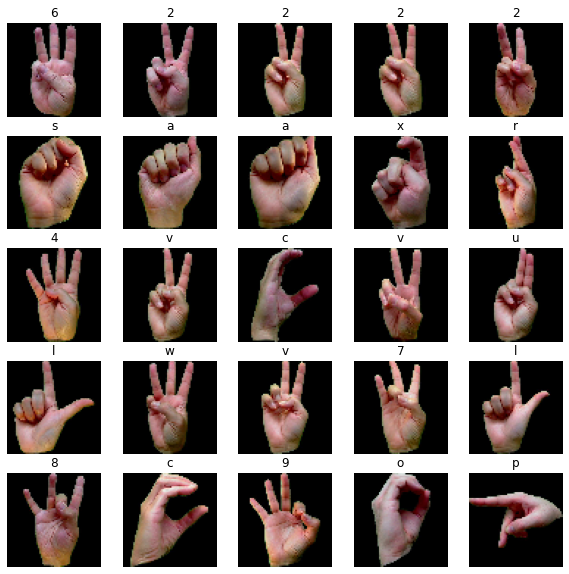

In [ ]:
image_batch, label_batch = next(train_data)
show_batch(image_batch, label_batch)

In [ ]:
#create a timehistory class to get a time for building a network
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [ ]:
input_shape = train_data.image_shape

# CNN Base Model

In the below cell we have implemented the base CNN model. 

In [62]:

%%time

time_callback = TimeHistory()

history = History()

model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64, 64, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(36))

model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

history=model.fit(train_data,
                            epochs=50,
                            validation_data=validation_data ,
                            callbacks=[history,time_callback],
                            verbose = 0
                           )


CPU times: user 4min 46s, sys: 17.2 s, total: 5min 3s
Wall time: 6min 14s


In [63]:
print(model.summary())
train_loss_cnn1 = history.history.get('loss')
val_loss_cnn1 = history.history.get('val_loss')
train_acc_cnn1 = history.history.get('accuracy')
val_acc_cnn1 = history.history.get('val_accuracy')
time_cnn1 = list(time_callback.times)
print('Total time taken ',sum(time_cnn1))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 29, 29, 64)        9280      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 12544)            

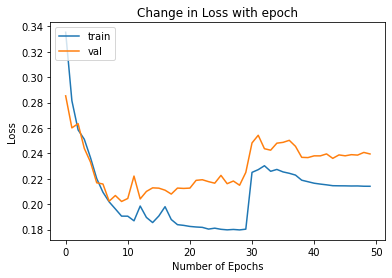

In [ ]:
plt.plot(train_loss_cnn1)
plt.plot(val_loss_cnn1)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Change in Loss with epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

# CNN Model 1

We increaesed the number of the CONV layers in the below model. This can be helpful and can perform more effectively when compared to the base model.

In [64]:
%%time

time_callback = TimeHistory()

history = History()

model_1 = Sequential()
model_1.add(Conv2D(16,(3,3),activation='relu',input_shape=(64, 64, 3)))
model_1.add(MaxPool2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64,(3,3),activation='relu'))
model_1.add(MaxPool2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(16,(3,3),activation='relu',input_shape=(64, 64, 3)))
model_1.add(MaxPool2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(16,(3,3),activation='relu',input_shape=(64, 64, 3)))
model_1.add(MaxPool2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(64, activation='relu'))
model_1.add(keras.layers.Dense(36))

model_1.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

history=model_1.fit(train_data,
                            epochs=50,
                            validation_data=validation_data ,
                            callbacks=[history,time_callback],
                            verbose = 0
                           )


CPU times: user 4min 52s, sys: 17.4 s, total: 5min 10s
Wall time: 6min 22s


In [65]:
print(model_1.summary())
train_loss_cnn2 = history.history.get('loss')
val_loss_cnn2 = history.history.get('val_loss')
train_acc_cnn2 = history.history.get('accuracy')
val_acc_cnn2 = history.history.get('val_accuracy')
time_cnn2 = list(time_callback.times)
print('Total time taken ',sum(time_cnn2))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 64)        9280      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 16)       

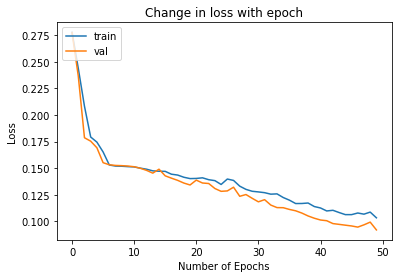

In [ ]:
plt.plot(train_loss_cnn2)
plt.plot(val_loss_cnn2)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Change in loss with epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

# CNN Model 2

Now we will increase the one layer and number of neurons in the fully connected layers. The increament in convolutional layers helped the model to feature engineer the patterns of the image for this problem statement. Now increament of layer and neuron in the fully-conneccted layer might be helpful to improvise the performance of the model further. 

In [66]:
%%time

time_callback = TimeHistory()

history = History()

model_2 = Sequential()
model_2.add(Conv2D(16,(3,3),activation='relu',input_shape=(64, 64, 3)))
model_2.add(MaxPool2D(2,2))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64,(3,3),activation='relu'))
model_2.add(MaxPool2D(2,2))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(16,(3,3),activation='relu',input_shape=(64, 64, 3)))
model_2.add(MaxPool2D(2,2))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(16,(3,3),activation='relu',input_shape=(64, 64, 3)))
model_2.add(MaxPool2D(2,2))
model_2.add(Dropout(0.25))

model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(64, activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(keras.layers.Dense(128, activation='relu'))
model_2.add(Dropout(0.10))
model_2.add(keras.layers.Dense(36))

model_2.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

history=model_2.fit(train_data,
                            epochs=50,
                            validation_data=validation_data ,
                            callbacks=[history,time_callback],
                            verbose = 0
                           )


CPU times: user 4min 51s, sys: 19.4 s, total: 5min 10s
Wall time: 6min 21s


In [67]:
print(model_2.summary())
train_loss_cnn3 = history.history.get('loss')
val_loss_cnn3 = history.history.get('val_loss')
train_acc_cnn3 = history.history.get('accuracy')
val_acc_cnn3 = history.history.get('val_accuracy')
time_cnn3 = list(time_callback.times)
print('Total time taken ',sum(time_cnn3))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 29, 29, 64)        9280      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 16)       

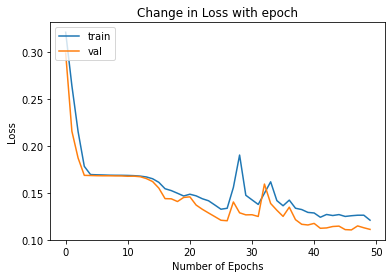

In [ ]:
plt.plot(train_loss_cnn3)
plt.plot(val_loss_cnn3)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Change in Loss with epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

# CNN Model 3

In [68]:
#Define the CNN layers

model_3 = Sequential() 
model_3.add(Conv2D(16,(3,3),activation='relu',input_shape=(64, 64, 3)))
model_3.add(MaxPool2D())
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64,(3,3),activation='relu'))
model_3.add(MaxPool2D())
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64,(3,3),activation='relu'))
model_3.add(MaxPool2D())
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(64,activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(36,activation='sigmoid'))

model_3.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy']) 

history=model_3.fit(train_data,
                            epochs=50,
                            validation_data=validation_data ,
                            callbacks=[history,time_callback],
                            verbose = 0
                           )

In [70]:
print(model_3.summary())
train_loss_cnn4 = history.history.get('loss')
val_loss_cnn4 = history.history.get('val_loss')
train_acc_cnn4 = history.history.get('accuracy')
val_acc_cnn4 = history.history.get('val_accuracy')
time_cnn4 = list(time_callback.times)
print('Total time taken ',sum(time_cnn4))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 29, 29, 64)        9280      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 64)       

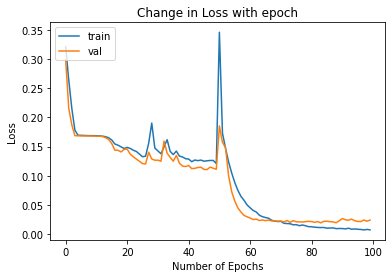

In [ ]:
plt.plot(train_loss_cnn4)
plt.plot(val_loss_cnn4)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Change in Loss with epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

# ResNet

In the below cell we will implement ResNet with the mentioned parameters. We consider having weights=None because we wanted to check the performance of the model with randomly initialized weights.

In [39]:
#ResNet
resnet = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=36
)

In [44]:
resnet.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy']) 
history=resnet.fit(train_data,
                  callbacks=[history,time_callback],
                   epochs = 50,
                    validation_data=validation_data ,
                  verbose = 1
                           )

Epoch 1/50
28/28 [==============================] - 23s 815ms/step - loss: 0.0477 - accuracy: 0.7411 - val_loss: 0.4089 - val_accuracy: 0.0477
Epoch 2/50
28/28 [==============================] - 21s 763ms/step - loss: 0.0259 - accuracy: 0.8807 - val_loss: 0.3082 - val_accuracy: 0.0955
Epoch 3/50
28/28 [==============================] - 21s 753ms/step - loss: 0.0220 - accuracy: 0.9114 - val_loss: 0.2892 - val_accuracy: 0.0981
Epoch 4/50
28/28 [==============================] - 21s 749ms/step - loss: 0.0221 - accuracy: 0.9177 - val_loss: 0.1954 - val_accuracy: 0.1724
Epoch 5/50
28/28 [==============================] - 21s 751ms/step - loss: 0.0253 - accuracy: 0.9006 - val_loss: 0.2161 - val_accuracy: 0.3210
Epoch 6/50
28/28 [==============================] - 21s 751ms/step - loss: 0.0184 - accuracy: 0.9387 - val_loss: 0.1904 - val_accuracy: 0.2480
Epoch 7/50
28/28 [==============================] - 21s 760ms/step - loss: 0.0156 - accuracy: 0.9597 - val_loss: 0.0864 - val_accuracy: 0.6233

In [48]:
print(resnet.summary())
train_loss_rn = history.history.get('loss')
val_loss_rn = history.history.get('val_loss')
train_acc_rn = history.history.get('accuracy')
val_acc_rn = history.history.get('val_accuracy')
time_rn = list(time_callback.times)
print('Total time taken ',sum(time_rn))

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

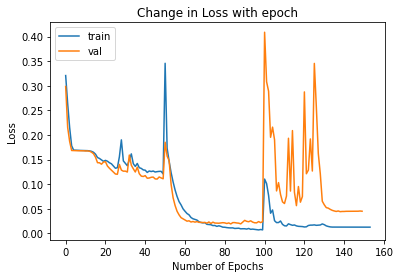

In [49]:
plt.plot(train_loss_rn)
plt.plot(val_loss_rn)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Change in Loss with epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

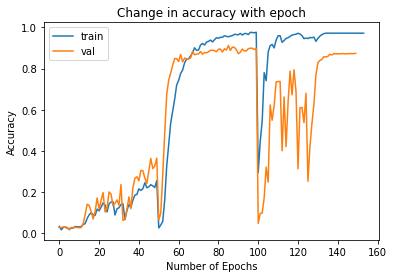

In [51]:
plt.plot(train_acc_rn)
plt.plot(val_acc_rn)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Change in accuracy with epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

# Model Comparision

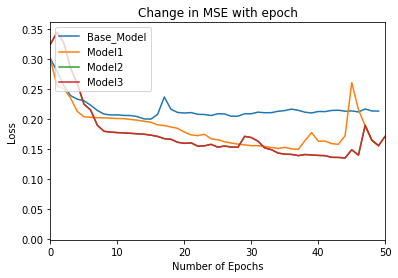

In [105]:
#plot the loss for the created CNN
plt.plot(val_loss_cnn1)
plt.plot(val_loss_cnn2)
plt.plot(val_loss_cnn3)
plt.plot(val_loss_cnn4)
plt.xlim(0, 50)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Change in MSE with epoch')
plt.legend(['Base_Model','Model1','Model2','Model3'],loc='upper left')
plt.show()

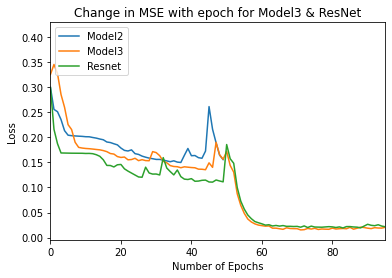

In [106]:
#The below graph shows the change in loss comparision between the CNN and Model2, Model3 and resnet
plt.plot(val_loss_cnn2)
plt.plot(val_loss_cnn3)
plt.plot(val_loss_rn)
plt.xlabel('Number of Epochs')
plt.xlim(0, 95)
plt.ylabel('Loss')
plt.title('Change in MSE with epoch for Model3 & ResNet')
plt.legend(['Model2','Model3','Resnet'],loc='upper left')
plt.show()

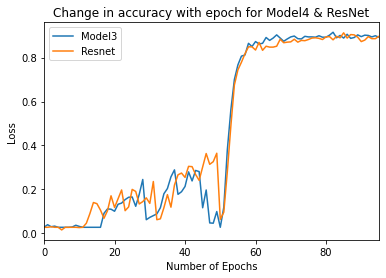

In [88]:
#The below graph shows the change in accuracy comparision between the CNN Model4 and resnet
plt.plot(val_acc_cnn4)
plt.plot(val_acc_rn)
plt.xlabel('Number of Epochs')
plt.xlim(0, 95)
plt.ylabel('Loss')
plt.title('Change in accuracy with epoch for Model4 & ResNet')
plt.legend(['Model3','Resnet'],loc='upper left')
plt.show()

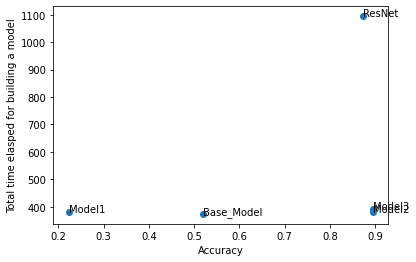

In [90]:
#Scatterplot for total time taken by models and their respective Accuracy values 
y = [sum(time_cnn1), sum(time_cnn2), sum(time_cnn3), sum(time_cnn4), sum(time_rn)]
z = [val_acc_cnn1[-1], val_acc_cnn2[-1], val_acc_cnn3[-1], val_acc_cnn4[-1], val_acc_rn[-1]]
n = ['Base_Model', 'Model1', 'Model2', 'Model3','ResNet']

fig, ax = plt.subplots()
ax.scatter(z, y)
plt.ylabel('Total time elasped for building a model')
plt.xlabel('Accuracy')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

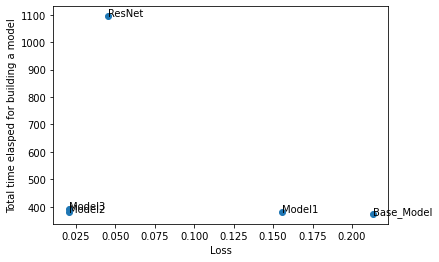

In [92]:
#Scatterplot for total time taken by models and their respective Loss values 
y = [sum(time_cnn1), sum(time_cnn2), sum(time_cnn3), sum(time_cnn4), sum(time_rn)]
z = [val_loss_cnn1[-1], val_loss_cnn2[-1], val_loss_cnn3[-1], val_loss_cnn4[-1], val_loss_rn[-1]]
n = ['Base_Model', 'Model1', 'Model2', 'Model3','ResNet']

fig, ax = plt.subplots()
ax.scatter(z, y)
plt.ylabel('Total time elasped for building a model')
plt.xlabel('Loss')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [100]:
#Dataframe for Loss, Accuracy and Total_Time
d = {'Accuracy': [val_acc_cnn1[-1],val_acc_cnn2[-1],val_acc_cnn3[-1],val_acc_cnn4[-1], val_acc_rn[-1]], 'Total_Time': [sum(time_cnn1), sum(time_cnn2), sum(time_cnn3), sum(time_cnn4), sum(time_rn)], 'Loss':[val_loss_cnn1[-1],val_loss_cnn2[-1],val_loss_cnn3[-1],val_loss_cnn4[-1], val_loss_rn[-1]]}
result_df = pd.DataFrame(data=d, index=['Base_Model','Model1','Model2','Model3','Resnet'])
result_df

,Accuracy,Total_Time,Loss
Base_Model,0.519894,374.016877,0.213350
Model1,0.222812,381.988137,0.155348
Model2,0.895225,380.993879,0.020365
Model3,0.895225,391.878730,0.020365
Resnet,0.874005,1094.513914,0.045137


**CONCLUSION: NETWORK ARCHITECTURE AND PERFORMANCE EVALUATION**

NETWORK ARCHITECTURE & PERFORMANCE EVALUATION: We can see that the Model2 perform best followed by the Model3, ResNet, Base_Model and Model1 (considering time, loss and accuracy). The reason for that are increased convolutional layers and increased number of layers & neurons (in fully-connected layers). The increased convolutions basically helped in pattern recognition of the image. Then the increased Fully-Connected layers and neurons were helpful to improvise the model's performance. This strategy helped our CNN architecture to perform better than the other CNN implementations for this specific problem statement. 

ResNet could have outperformed Model2 if we initialized the network with pretrained weights, here we initialized it using the random initialization. (Due to lack of computational resources)


References: https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/</br>
https://keras.io/api/applications/resnet/</br>
https://machinelearningmastery.com/</br>
https://keras.io/</br>